In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'),iris['Class'], test_size = 0.2, random_state = 1004, stratify =iris['Class'] )
print('X_train', X_train.shape, 'X_test', X_test.shape)
print('y_train', y_train.shape, 'y_test', y_test.shape)
y_train.value_counts()


X_train (120, 4) X_test (30, 4)
y_train (120,) y_test (30,)


Versicolour    40
Virginica      40
Setosa         40
Name: Class, dtype: int64

#StandardScaler 회귀보다는 분류문제에 유용함



In [ ]:
from sklearn.preprocessing import StandardScaler
# StandardScaler를 한 번 생성하고 훈련 데이터와 테스트 데이터에 각각 적용
StdScaler = StandardScaler()
# fit()을 통해 스케일링 모델을 훈련 데이터에 적합하게 만든 후, 이 모델을 테스트 데이터에도 적용
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)
X_test_sc = StdScaler.transform(X_test)
print('\t\t(min, max) (mean, std)')
print(f'Train_scaled {X_train_sc.min():.2f}, {X_train_sc.max():.2f}, { X_train_sc.mean():.2f}, {X_train_sc.std():.2f}')
print(f'Test_scaled  {X_test_sc.min():.2f}, {X_test_sc.max():.2f}, { X_test_sc.mean():.2f}, {X_test_sc.std():.2f}')

		(min, max) (mean, std)
Train_scaled -2.37, 3.04, 0.00, 1.00
Test_scaled  -1.76, 2.48, -0.01, 0.97


#MinMaxScaler 0~1 사이 회귀분석에 유용 이상치에 민감

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 한 번 생성하고 훈련 데이터와 테스트 데이터에 각각 적용
scaler = MinMaxScaler()
# fit()을 통해 스케일링 모델을 훈련 데이터에 적합하게 만든 후, 이 모델을 테스트 데이터에도 적용
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

print(f'Train_scaled {X_train_sc.min():.2f}, {X_train_sc.max():.2f}, {X_train_sc.mean():.2f}, {X_train_sc.std():.2f}')
print(f'Test_scaled {X_test_sc.min():.2f}, {X_test_sc.max():.2f}, {X_test_sc.mean():.2f}, {X_test_sc.std():.2f}')

Train_scaled 0.00, 1.00, 0.46, 0.27
Test_scaled 0.03, 1.06, 0.45, 0.26


#MaxAbsScaler 최대 절대값 -1~1 회귀분석에 유용 이상치에 민감

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
MaScaler = MaxAbsScaler()
X_train_sc = MaScaler.fit_transform(X_train)
X_test_sc = MaScaler.transform(X_test)

print(f'Train_Scaler {X_train_sc.min():.2f}, {X_train_sc.max():.2f}, {X_train_sc.mean():.2f}, {X_train_sc.std():.2f}')
print(f'Test_Scaler {X_test_sc.min():.2f}, {X_test_sc.max():.2f}, {X_test_sc.mean():.2f}, {X_test_sc.std():.2f}')

Train_Scaler 0.04, 1.00, 0.62, 0.24
Test_Scaler 0.08, 1.03, 0.62, 0.24


# Robust Scaler 평균과 분산대신 중앙값과 사분위 값을 활용하는 방식으로 이상치의 영향을 최소화한다.


In [ ]:
from sklearn.preprocessing import RobustScaler

RobScaler= RobustScaler()
X_train_sc = RobScaler.fit_transform(X_train)
X_test_sc = RobScaler.transform(X_test)

print(f'Train_Scaler {X_train_sc.min():.2f}, {X_train_sc.max():.2f}, {X_train_sc.mean():2f}, {X_train_sc.std():.2f}')
print(f'Test_Scaler {X_test_sc.min():2f}, {X_test_sc.max():.2f}, {X_test_sc.mean():2f}, {X_test_sc.std():.2f}')

Train_Scaler -1.90, 2.67, -0.023394, 0.65
Test_Scaler -1.142857, 1.90, -0.023565, 0.62


#원본 스케일로 복원

In [ ]:
pd.DataFrame(X_train_sc).head()

,0,1,2,3
0,0.846154,0.190476,0.157143,0.133333
1,-0.153846,-0.380952,0.157143,0.466667
2,-0.076923,0.000000,-0.042857,-0.066667
3,0.384615,0.761905,0.357143,0.733333
4,-0.615385,0.761905,-0.785714,-0.600000


In [ ]:
X_Original = RobScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head()

,0,1,2,3
0,6.9,3.1,4.9,1.5
1,5.6,2.8,4.9,2.0
2,5.7,3.0,4.2,1.2
3,6.3,3.4,5.6,2.4
4,5.0,3.4,1.6,0.4


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [ ]:
feature = ['수치형 변수1', '수치형 변수2']
x = iris.drop(columns = 'Class')

from sklearn.preprocessing import StandardScaler
StScaler = StandardScaler()
x = StScaler.fit_transform(x)
pd.DataFrame(x)


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


#PCA 차원축소

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_fit = pca.fit(x)
print(f'고유값: {np.round(pca.singular_values_, 4)}') # 배열형태이므로 f-스트링즈 사용안됨
print(f'분산의 설명력: {np.round(pca.explained_variance_ratio_, 4)}')

고유값: [20.9231 11.7092  4.6919  1.7627]
분산의 설명력: [0.7296 0.2285 0.0367 0.0052]


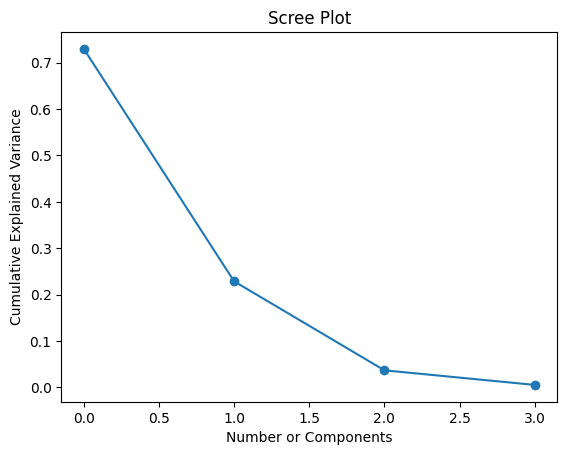

In [38]:
import matplotlib.pyplot as plt
plt.title('Scree Plot')
plt.xlabel('Number or Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [39]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [40]:
X_train.shape, y_train.shape

((120, 4), (120,))

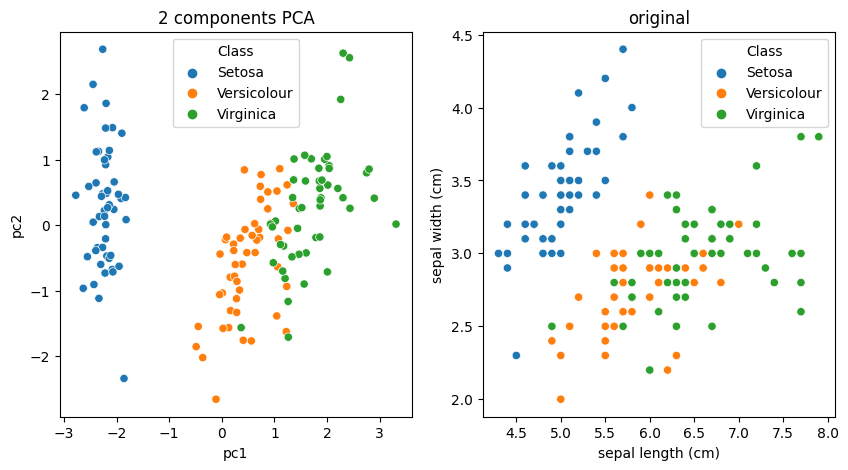

In [41]:
import seaborn as sns

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.title('2 components PCA')
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris['Class'], data = principal_iris)
plt.subplot(1,2,2)
plt.title('original')
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'Class', data = iris)
plt.show()

#데이터 불균형 문제 under sampling & over sampling

In [43]:
!pip install imbalanced-learn

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
x, y = make_classification(n_samples = 2000, n_features = 6, weights = [0.95], flip_y =0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [44]:
'''
from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.under_sampling import RandomUnderSampler
>>> X, y = make_classification(n_classes=2, class_sep=2,
...  weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
... n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
>>> print('Original dataset shape %s' % Counter(y))
Original dataset shape Counter({1: 900, 0: 100})
>>> rus = RandomUnderSampler(random_state=42)
>>> X_res, y_res = rus.fit_resample(X, y)
>>> print('Resampled dataset shape %s' % Counter(y_res))
Resampled dataset shape Counter({0: 100, 1: 100})
'''
undersample = RandomUnderSampler(sampling_strategy ='majority') # majority 는 다수 레이블의 데이터를 소수 레이블 수와 동일하게 줄임
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [45]:
undersample = RandomUnderSampler(sampling_strategy =0.5)# 0~1의 비율 , 0.5 는 다수 레이블의 데이터를 소수 레이블의 2배가 되게 함 1이면 100개
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 200, 1: 100})


In [46]:
'''
>>> from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.over_sampling import RandomOverSampler
>>> X, y = make_classification(n_classes=2, class_sep=2,
... weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
... n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
>>> print('Original dataset shape %s' % Counter(y))
Original dataset shape Counter({1: 900, 0: 100})
>>> ros = RandomOverSampler(random_state=42)
>>> X_res, y_res = ros.fit_resample(X, y)
>>> print('Resampled dataset shape %s' % Counter(y_res))
'''
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))


Counter({0: 1900, 1: 950})


In [47]:
oversample = RandomOverSampler() # sampling_strategy ='minority'
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))


Counter({0: 1900, 1: 1900})


In [48]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


In [49]:
x_under.shape

(300, 6)

### x, y = make_classification(n_samples = 2000, n_features = 6, weights = [0.95], flip_y =0)


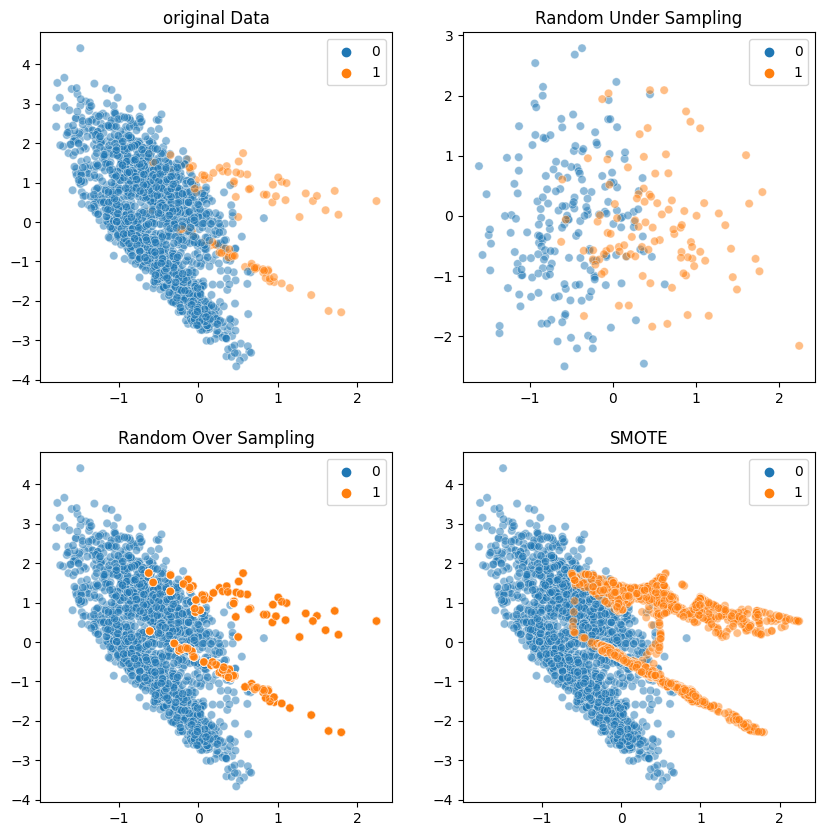

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.scatterplot(x = x[:, 1], y = x[:, 2], hue = y, ax =axes[0][0], alpha = 0.5)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 3], hue = y_under, ax = axes[0][1], alpha = 0.5)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue = y_over, ax = axes[1][0], alpha = 0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue = y_sm, ax = axes[1][1], alpha = 0.5)

axes[0][0].set_title('original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')
plt.show()